# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [2]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [3]:
#Seu código aqui para a média
agrupamento = df.groupby(by="Categoria")[["Preco_Normal"]]
media_cat = agrupamento.mean().rename(columns={"Preco_Normal":"Media_Preco"})

media_cat.reset_index()


,Categoria,Media_Preco
0,belleza-y-cuidado-personal,1783.556485
1,comidas-preparadas,3095.043478
2,congelados,2108.042553
3,frutas,1724.473684
4,instantaneos-y-sopas,765.491228
5,lacteos,2385.219239
6,verduras,1343.296875


In [4]:
#Seu código aqui para a mediana
mediana_cat = agrupamento.median().rename(columns={"Preco_Normal":"Mediana_Preco"})
mediana_cat.reset_index()

# fig = plt.figure(figsize=(10,8))
# plt.scatter(x=range(7), y=media_cat["Media_Preco"], color="red")
# plt.scatter(x=range(7), y=mediana_cat["Mediana_Preco"], color="blue")

,Categoria,Mediana_Preco
0,belleza-y-cuidado-personal,1569.0
1,comidas-preparadas,3290.0
2,congelados,1519.0
3,frutas,1195.0
4,instantaneos-y-sopas,439.0
5,lacteos,989.0
6,verduras,1180.0


As categorias cujas médias aparentam distoar significamente da mediana são:
- 'congelados',
- 'frutas',
- 'instantaneos-y-sopas',
- 'lacteos',

todas com média acima da mediana.

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [5]:
#Seu código aqui
std_cat = agrupamento.std().rename(columns={"Preco_Normal":"Desvio_Padrao"}) #groupby preparado previamente 

std_cat.reset_index()

# fig = plt.figure(figsize=(10,8))
# plt.scatter(x=range(7), y=media_cat["Media_Preco"], color="red")
# plt.scatter(x=range(7), y=mediana_cat["Mediana_Preco"], color="blue")
# plt.bar(x=range(7), height=std_cat["Desvio_Padrao"], color="green", alpha=0.2)


,Categoria,Desvio_Padrao
0,belleza-y-cuidado-personal,2210.041719
1,comidas-preparadas,2019.911428
2,congelados,2111.539896
3,frutas,1639.151114
4,instantaneos-y-sopas,1170.232869
5,lacteos,3925.816164
6,verduras,1012.699625


A categoria com maior diferença entre média e mediana, 'lacteos', é também a categoria com o maior desvio padrão, de longe.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

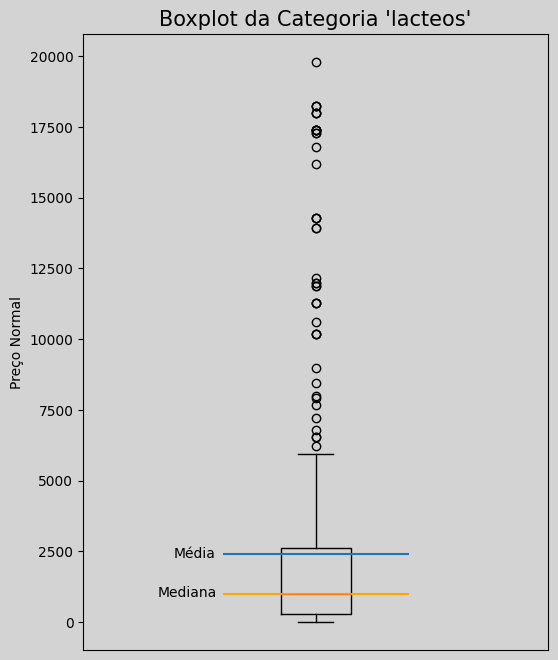

In [6]:
#Seu código aqui
mask = df["Categoria"]=="lacteos"
fig = plt.figure(figsize=(6,8), facecolor="lightgray")
box = plt.boxplot(df[mask]["Preco_Normal"])

plt.title("Boxplot da Categoria 'lacteos'", size=15)
plt.ylabel("Preço Normal")
fig.get_axes()[0].set_facecolor("lightgray")
plt.hlines(media_cat.loc["lacteos"].item(), xmin=0.8, xmax=1.2)
plt.text(0.694, media_cat.loc["lacteos"].item()*0.95, "Média")
plt.hlines(mediana_cat.loc["lacteos"].item(), xmin=0.8, xmax=1.2, color="orange")
plt.text(0.66, mediana_cat.loc["lacteos"].item()*0.92, "Mediana")
plt.xticks([])
plt.show()

A distribuição é extremamente concentrada em valores pequenos, com muitos outliers possuindo valores altíssimos.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

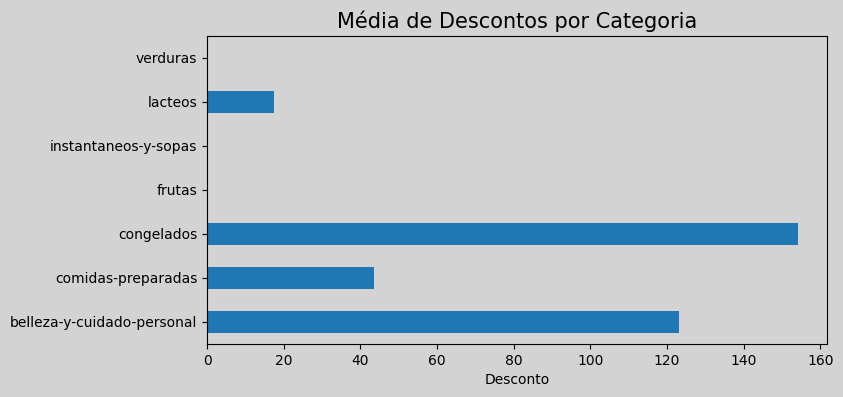

In [7]:
# Seu código aqui
desconto_cat = df.groupby(by="Categoria")["Desconto"].mean()
fig = plt.figure(figsize=(8,4), facecolor="lightgray")
desconto_cat.plot(kind="barh")
fig.get_axes()[0].set_facecolor("lightgray")
plt.title("Média de Descontos por Categoria", size=15)
plt.ylabel(None)
plt.xlabel("Desconto")
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [71]:
# Seu código aqui

# média de desconto por categoria e por marca
treemap = df.groupby(by=["Categoria", "Marca"])["Desconto"].mean().reset_index().rename(columns={"Desconto":"Media_Desconto"})

fig = px.treemap(treemap, values="Media_Desconto", path=["Categoria", "Marca"], color="Marca", color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(
    title = "Média de Desconto Agrupada por Categorias e Marcas",
    margin = {"r":0, "l":0, "b":0},
    paper_bgcolor="lightgray",
)
